# The preliminaries

# Examine a digital image using the fiji app.
- [ImageJ/Fiji](https://imagej.net/software/fiji/) is an excellent point-and-click GUI-based application that I frequently use to examine imaging data and to create mock-up data analysis pipe-lines. ImageJ requires no coding, but provides an extensive collection of built-in functions and "plug-ins" for almost any image processing scenario. If you know Java, then you can create ImageJ based solutions for your problems.
- MatLab is the other commonly used application that comes with an excellent Image Processing library. However, it is not free to use!
- There is also [napari](https://napari.org/stable/): a slick and fast image viewer developed for image visualization and analysis in python.

Download the following movie, which captures dividing HeLa cells using Phase Contrast microscopy. Open it with Fiji/ImageJ.

# The basic template for a Python script
You should start by importing the libraries that provide the functions that you want to use in the script. In this case, we will use:
1. numpy - numerical function library for storing and manipulating data (imported under the "np" alias)
2. the pyplot module in the matplotlib library (alias "plt")
3. skimage is an image processing library with support for an extensive range of utilities and functions.

Once the required modules and functions have been imported, you can use them to visualize, process, and analyze imaging data.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# I am importing two functions from the io module of the skimage library
from skimage.io import imread, imshow

### Mounting files from your Google drive
This is the standard method for accessing files from your harddrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# The line below is a "magic" command - I am using the shell function "cd", 
# i.e., "change directory" to navigate to the folder where I stored the images
# for this class.
%cd '/content/drive/My Drive/Colab Notebooks/IISER_2023/Images/L1/'
img = imread('raw_img.tif')

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/IISER_2023/Images/L1


## Read in an image and inspect the properties of the object created in Python


the object type for the img:  <class 'numpy.ndarray'>


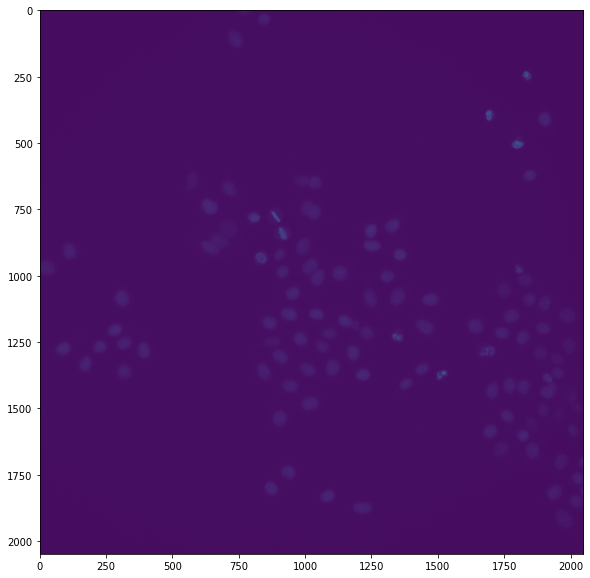

In [ ]:
# Reading images is straight-forward. 

img = imread('https://raw.githubusercontent.com/ajitpj/IISER_2023/main/Images/L1/raw_img.tif')
print("the object type for the img: ", type(img))

# Show the image
f1, a1 = plt.subplots(figsize=(10,10))
plt.imshow(img)

In [ ]:
print("Shape of the image is: ", img.shape)

Shape of the image is:  (2048, 2048)


# 1. What is a digital image?
A digital image is a spatial map of light intensity measured by electronic devices that are typically divided into a number of light-sensitive sub-regions known as "pixels".

Underlying any digital image, you will find a **two dimensional array** of numbers. Each number is, ideally, proportional to the amount of light detected by one pixel in the detector.

[[ 987  954  877  872  679  513  445  316  307  284]
 [1014 1099  968  928  722  556  438  359  342  263]
 [1079 1075 1123  945  790  613  509  353  371  336]
 [1117 1181 1083 1027  891  697  594  475  366  344]
 [ 975 1096 1098 1087  942  887  732  644  519  339]
 [ 934 1054 1062 1139 1051 1038  878  798  659  500]
 [ 838  990 1033 1173 1088 1037  999  937  799  542]
 [ 768  869  987 1090 1099 1066 1023 1018  954  739]
 [ 609  757  843 1020 1063 1090 1042  981  953  782]
 [ 538  588  692  800  909  982 1068 1052 1005  884]
 [ 462  535  618  627  814  911 1038 1074 1078  971]
 [ 400  492  538  556  778  879  969 1073 1075 1037]
 [ 415  400  513  528  595  773  899  916 1052  981]
 [ 334  378  422  480  591  669  878 1011 1048 1029]
 [ 297  339  374  378  492  642  757  890  881  963]
 [ 291  289  301  398  448  553  698  801  853  905]
 [ 291  303  300  338  388  510  604  648  677  662]
 [ 251  272  257  281  333  371  488  525  575  636]
 [ 248  244  278  260  291  330  431  412  410

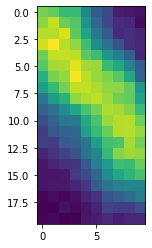

In [ ]:
# just a trick to print the array legibly
with np.printoptions(threshold=np.inf):
    print(img[780:800,890:900])
plt.imshow(img[780:800,890:900])

In [ ]:
# You can even read images stored on remote locations using urls
imgstack = imread('https://raw.githubusercontent.com/ajitpj/IISER_2023/main/Images/L1/20230214_A3_2-1.tif')

### Indexing exercise (2 minutes):
1. Print the shape of the image. What does it mean?

2. How would you access the first plane of the img_stack?

3. Display the 25th plane in the image stack.

## Exercise (5 min): Simulate an image and display it.

###  What are some of the steps that you would take to simulate an image?
For those new to coding: state the steps in plain english. We will then translate them into pythonese once we agree on a plan of action.

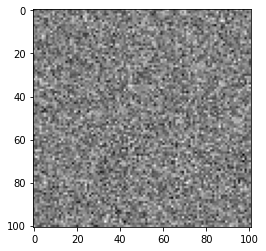

In [ ]:
# define the parameters first
nrows = 101
ncols = 101
base_signal = 50
noise_sd = 10 # for adding noise to the base signal

sim_img = base_signal + np.zeros((nrows, ncols), dtype='uint8')

# You can add in noise

sim_img = sim_img + noise_sd*np.random.randn(nrows, ncols)
plt.imshow(sim_img, cmap='gray')

Exercise (2 min): How will you add an object to the image?

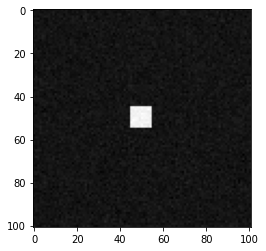

In [ ]:
obj_signal = 400
sim_img[45:55,45:55] = sim_img[45:55,45:55] + obj_signal
plt.imshow(sim_img, cmap='gray')

# Dislpaying an image:
Displaying an image requires two decisions:
1. You must assign a distinct color or intensity value to each of the numbers in the array. This 1:1 mapping between the numerical value and the color/shade/intensity is defined by the "Look Up Table (LUT)", also known as the colormap. 
2. You must also set the range of intensities to be displayed. For grayscale images, this means setting a low intensity value as the "black" pixel and a high intensity value as a "white" pixel (reverse in inverted images).

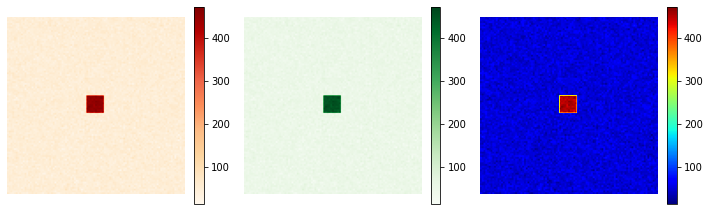

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 25))

a1 = ax[0].imshow(sim_img, cmap='OrRd')
plt.colorbar(a1, ax=ax[0],fraction=0.05, pad=0.05)
a2 = ax[1].imshow(sim_img, cmap='Greens')
plt.colorbar(a2, ax=ax[1],fraction=0.05, pad=0.05)
a3 = ax[2].imshow(sim_img, cmap='jet')
plt.colorbar(a3, ax=ax[2],fraction=0.05, pad=0.05)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off');

/usr/local/lib/python3.9/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


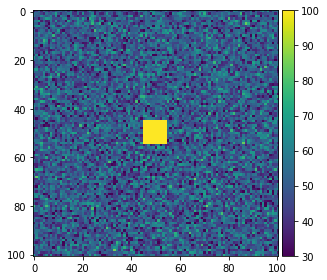

In [ ]:
imshow(sim_img, vmax=100, vmin=30)

### Question: How would you set the vmax and vmin values for an image?

# Histogram - an important method to visualize the intensity information in an image
The image intensity histogram provides a quick overview of the intensity information contained within the image. The histogram tabulates the frequency of observing each intensity value over the specified range. 

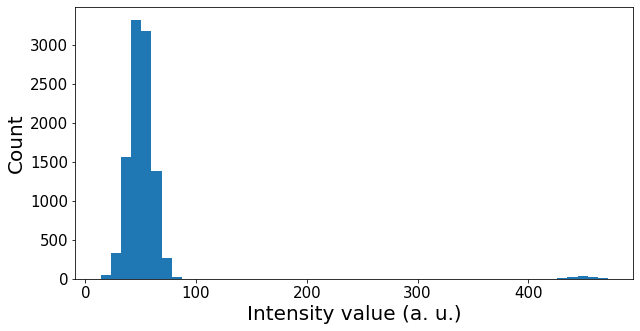

In [ ]:
f3, a3 = plt.subplots(figsize=(10,5))
a3.hist(sim_img.flatten(), bins=50);
a3.set_xlabel('Intensity value (a. u.)', fontsize=20)
a3.set_ylabel('Count', fontsize=20)
a3.tick_params(axis='both', which='major', labelsize=15)

# RGB (color) images
RGB or CMYK color images are simply numpy arrays with 3 dimensions: xy and c (color channel). 

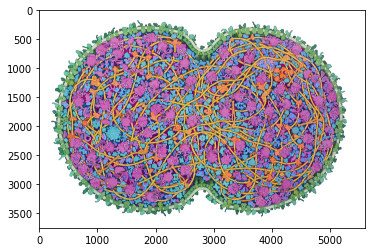

In [ ]:
img = imread('https://cdn.rcsb.org/pdb101/goodsell/tif/jcvi-syn3a-minimal-cell.tif')
plt.imshow(img);

## Exercise (5 min): Confirm that the image above has 3 dimensions. Display the three channels separately.

In [ ]:
img.shape

(3748, 5612, 3)